In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import sys, os, time
from sv_algorithm import IntensityClustering
import cProfile, pstats, StringIO
sys.path.insert(0, '../code/')
import transformation
from helper_functions import hmdb_analysis

# Profiling stuff
pr = cProfile.Profile()
pr.enable()

# The path where data files live: currently, it is in grandparent_folder/data/<file>.csv
grandparent_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
data_dir = grandparent_dir + '/data/'
data_file = 'Urine_37_fullscan1_POS.csv'
file_path = data_dir + data_file

# Path where transformation files live
transformation_folder = os.path.normpath(os.getcwd() + os.sep + os.pardir) + '/dbs/'
transformation_file = 'pos_transformations_camra.yml'
transformation_path = transformation_folder + transformation_file

print ("\nLoading transformations from:\n" + transformation_path + "...\n")
transformations = transformation.load_from_file(transformation_path)
print ("\nLoaded " + str(len(transformations)) + " transformations.")


Loading transformations from:
/home/simonas/Dropbox/University/Project/Coding/ms1fun/dbs/pos_transformations_camra.yml...

Charge Probabilities
+K: 0.200
+2H: 0.100
+H: 0.500
+Na: 0.200

Adduct Probabilities
-CO: 0.071
+CH2O2: 0.071
none: 0.357
+ACN: 0.071
-C2H2: 0.071
-CH2O2: 0.071
+CH3OH: 0.071
-NH3: 0.071
-H2O: 0.071
+NH3: 0.071

Isotope Probabilities
C13: 0.154
mono: 0.769
2C13: 0.077

Multiplicity Probabilities
1: 0.909
2: 0.091

Loaded 150 transformations.


In [2]:
# Initialises an object that loads peaks from a file and gives the RT threshold in seconds
cluster = IntensityClustering(file_path, transformations, rt_thresh=2, tolerance=10)


Creating peaks from a file at: 
/home/simonas/Dropbox/University/Project/Coding/data/Urine_37_fullscan1_POS.csv...

7733 peaks loaded!


In [3]:
# Taking most intense peak, figuring out the groups around it (within given RT window)
print ("Processing...")
start_time = time.clock()
groups = cluster.heavylifting()
end_time = time.clock()
print ("Data processing time: " + str(end_time-start_time))

Processing...
7733 peaks left to process...
7347 peaks left to process...
7100 peaks left to process...
6852 peaks left to process...
6635 peaks left to process...
6436 peaks left to process...
6228 peaks left to process...
6040 peaks left to process...
5867 peaks left to process...
5712 peaks left to process...
5536 peaks left to process...
5384 peaks left to process...
5209 peaks left to process...
5074 peaks left to process...
4938 peaks left to process...
4801 peaks left to process...
4669 peaks left to process...
4542 peaks left to process...
4410 peaks left to process...
4280 peaks left to process...
4163 peaks left to process...
4024 peaks left to process...
3894 peaks left to process...
3779 peaks left to process...
3654 peaks left to process...
3527 peaks left to process...
3395 peaks left to process...
3280 peaks left to process...
3160 peaks left to process...
3040 peaks left to process...
2925 peaks left to process...
2803 peaks left to process...
2685 peaks left to process

In [4]:
# Write out the results to a file. Top voted group presented at the top.
groups = sorted(groups, key=lambda x: x.vote, reverse=True)
output_dir = grandparent_dir + '/output/'
output_file = 'Urine_37_fullscan1_POS_by_vote.txt'
output_path = output_dir + output_file

with open(output_path, 'w') as f:
    for group in groups:
        line = "vote: {}, M: {}\n".format(group.vote, group.M)
        f.write(line)
        line = '\tPeak m/z,Peak rt,Peak intensity,transformation (transformed mass,vote)\n'
        f.write(line)
        # members = (peak, transformation, transformed_mass); x[1] = list(transformation)
        for (peak, transformation, transformed_mass) in sorted(group.members, key=lambda x: x[1].vote, reverse=True):
            line = "\t{:.4f},{:.4f},{:.2e},{} ({:.4f},{:.4f})\n".format(peak.mass, peak.rt, peak.intensity,
                    transformation, transformed_mass, transformation.vote)
            f.write(line)
        f.write('\n')

print ("\nOutput file has been prepared:\n{}".format(output_path))
print ("Total groups found: " + str(len(groups)))


Output file has been prepared:
/home/simonas/Dropbox/University/Project/Coding/output/Urine_37_fullscan1_POS_by_vote.txt
Total groups found: 5646


Loaded 3075 molecules from ../dbs/hmdb.txt
Number of raw hits (i.e. comparing all peaks): 882 (11% of peaks)
Number of group hits (i.e. hits on group Ms): 695 (12% of groups)


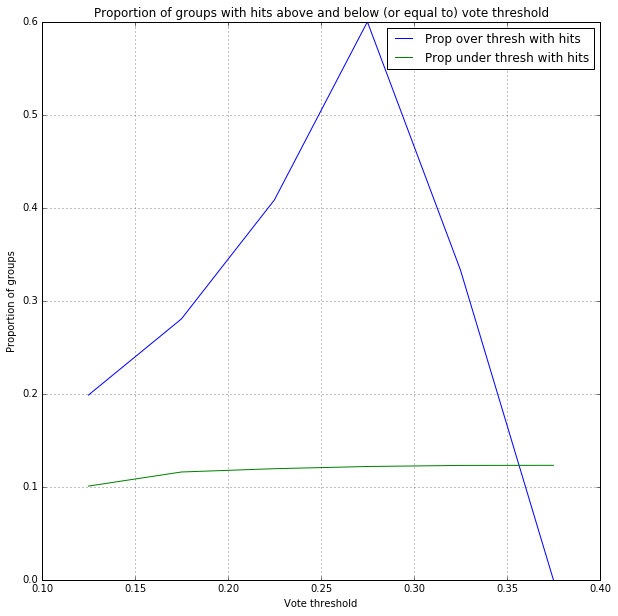

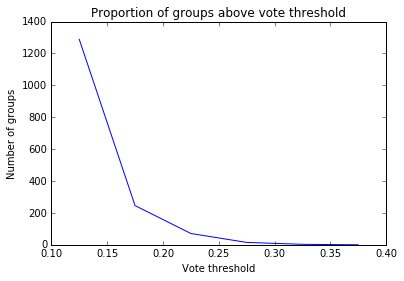

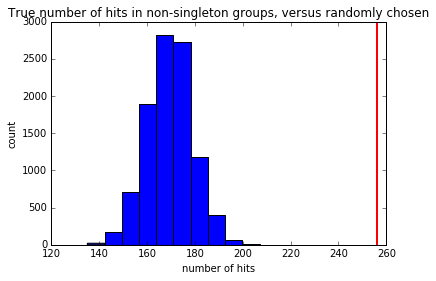

In [11]:
# v_thresh = np.arange(0.1249,0.35,0.1). However: numpy documentation advises against using arange with non-integer 
# steps, as this could lead to inconsistent results.

counts = hmdb_analysis(groups, filename=output_file[:-4], v_thresh = np.arange(0.1249,0.38,0.05),
                       hmdb_filter = ['Expected and Not Quantified'])

In [7]:
# Command line printing
# for group in groups:
#     print group

# Profiling continued
pr.disable()
s = StringIO.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats('time')
ps.print_stats()
print s.getvalue()

         918477534 function calls (918449190 primitive calls) in 481.330 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1  241.102  241.102  305.232  305.232 sv_algorithm.py:132(heavylifting)
       10  135.655   13.566  135.655   13.566 {zmq.backend.cython._poll.zmq_poll}
760709609   33.428    0.000   33.428    0.000 {abs}
 42345000   24.549    0.000   26.773    0.000 ../code/transformation.py:24(reversetransform)
    20000   19.749    0.001   22.781    0.001 /usr/lib/python2.7/random.py:277(shuffle)
    53516   14.056    0.000   14.056    0.000 ../code/databases.py:45(<genexpr>)
 43262322    3.312    0.000    3.312    0.000 {method 'append' of 'list' objects}
 67520000    3.031    0.000    3.031    0.000 {method 'random' of '_random.Random' objects}
   372457    0.651    0.000    0.692    0.000 sv_algorithm.py:59(recalculate)
   634056    0.554    0.000    0.596    0.000 ../code/transformation.py:16(transform)
  